# Random Signals and LTI-Systems

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Introduction

The response of a system $y[k] = \mathcal{H} \{ x[k] \}$ to a random input signal $x[k]$ is the foundation of statistical signal processing. In the following we limit ourselves to [linear-time invariant (LTI) systems](https://en.wikipedia.org/wiki/LTI_system_theory).

![Illustration: LTI-System](../images/systems-2.png)

Let's assume that the statistical properties of the input signal $x[k]$ are known, for instance its first and second order ensemble averages. Let's further assume that the impulse response $h[k]$ or the transfer function $H(e^{\,\mathrm{j}\,\Omega})$ of the LTI system is given. We are looking for the statistical properties of the output signal $y[k]$ and the joint properties between the input $x[k]$ and output $y[k]$ signal.

## Stationarity and Ergodicity

The question arises if the output signal $y[k]$ of an LTI system is (weakly) stationary or stationary and ergodic for an input signal $x[k]$ exhibiting the same properties. 

Let's assume that the input signal $x[k]$ originates from a stationary random process. According to the [definition of stationarity](../random_signals/stationary_ergodic.ipynb#Definition) the following relation must hold

$$ E\{ f(x[k_1], x[k_2], \dots) \} = E\{ f(x[k_1 + \Delta], x[k_2 + \Delta], \dots) \}$$

where $\Delta \in \mathbb{Z}$ denotes an arbitrary (temporal) shift. The condition for time-invariance of a system reads

$$ y[k + \Delta] = \mathcal{H} \{ x[k + \Delta] \} $$

By introducing this into the right hand side of the definition of stationarity for the output signal $y[k]$ and recalling that $y[k] = \mathcal{H} \{ x[k] \}$ we can show that

$$ E\{ g(y[k_1], y[k_2], \dots) \} = E\{ g(y[k_1 + \Delta], y[k_2 + \Delta], \dots) \}$$

where $g(\cdot)$ denotes an arbitrary mapping function that may differ from $f(\cdot)$. From the equation above, it can be concluded that the output signal of an LTI system for a (weakly) stationary input signal is also (weakly) stationary. The same reasoning can also be applied to a [(weakly) ergodic](../random_signals/stationary_ergodic.ipynb#Ergodic-Random-Processes) input signal.

Summarizing, for an input signal $x[k]$ that is

* (weakly) stationary, the output signal $y[k]$ is (weakly) stationary and the in- and output is jointly (weakly) stationary
* (weakly) ergodic, the output signal $y[k]$ is (weakly) ergodic and the in- and output is jointly (weakly) ergodic

This implies for instance, that for a weakly stationary input signal measures like the auto-correlation function (ACF) can also be applied to the output signal.

### Example

The following example computes and plots estimates of the linear mean $\mu[k]$ and auto-correlation function (ACF) $\varphi[k_1, k_2]$ for the in- and output of an LTI system. The input $x[k]$ is drawn from a normal distributed white noise process.

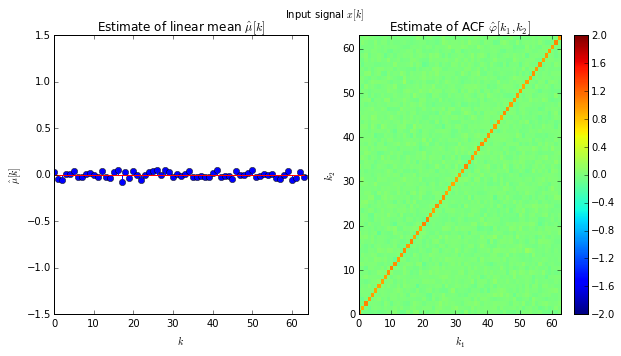

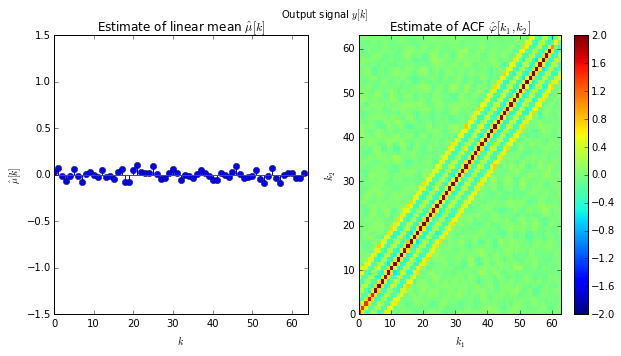

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate input signal (white Gaussian noise)
x = np.random.normal(size=(N, L))
# generate output signal
h = 2*np.fft.irfft([1,1,1,0,0,0])
y = np.asarray([np.convolve(x[n,:], h, mode='same') for n in range(N)])

# compute and plot results
def compute_plot_results(x):

    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)
    
    plt.subplot(121)
    plt.stem(mu)
    plt.title(r'Estimate of linear mean $\hat{\mu}[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])

    plt.subplot(122)
    plt.pcolor(np.arange(L), np.arange(L), acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)

    
plt.figure(figsize = (10, 5))
plt.gcf().suptitle(r'Input signal $x[k]$')
compute_plot_results(x)

plt.figure(figsize = (10, 5))
plt.gcf().suptitle(r'Output signal $y[k]$')
compute_plot_results(y)

**Exercise**

* Is the in- and output signal weakly stationary?
* Can the output signal $y[k]$ assumed to be white noise?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>